# Rozwiązanie pracy domowej nr 4 z TWD

Filip Szympliński

nr albumu: 313513

In [21]:
# Wczytanie potrzebnych pakietów
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [227]:
# Wczytanie ramki danych o grach
df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16286,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


***

## Zadanie 1.

### a)
Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.

In [4]:
df.loc[((df.Year > 2015) & \
        (df.Publisher == "Nintendo") & \
        (df.NA_Sales < df.EU_Sales))][["Name"]]

,Name
4199,Mario & Sonic at the Rio 2016 Olympic Games
6477,Mario & Sonic at the Rio 2016 Olympic Games
14703,Teddy Together


### b)
Jak rodzaj gry zarobił najwięcej w roku 2010?

In [18]:
df_b = df.loc[(df.Year == 2010)]
df_b.groupby("Genre")[["Global_Sales"]]\
.apply(np.sum)\
.sort_values(["Global_Sales"], ascending = False)\
.reset_index()\
.iloc[0,0]

'Action'

### c)
Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.

In [235]:
df_c = df.groupby("Genre")[["EU_Sales", "JP_Sales"]].agg("mean").reset_index()
df_c = df_c.loc[(df_c.JP_Sales > df_c.EU_Sales)]
df_c
df_c = df_c[["Genre", "JP_Sales"]]
df_c.rename(columns = {"Genre" : "Typ Gry", "JP_Sales" : "Średnia sprzedaż w Japonii"})

,Typ Gry,Średnia sprzedaż w Japonii
5,Puzzle,0.099439
7,Role-Playing,0.238293
11,Strategy,0.073284


***

## Zadanie 2.

### Oryginalny wykres 
[źródło](https://www.rp.pl/polityka/art19043381-sondaz-ibris-dla-rzeczpospolitej-poparcie-wzroslo-wszystkim-tylko-nie-konfederacji-i-psl/)

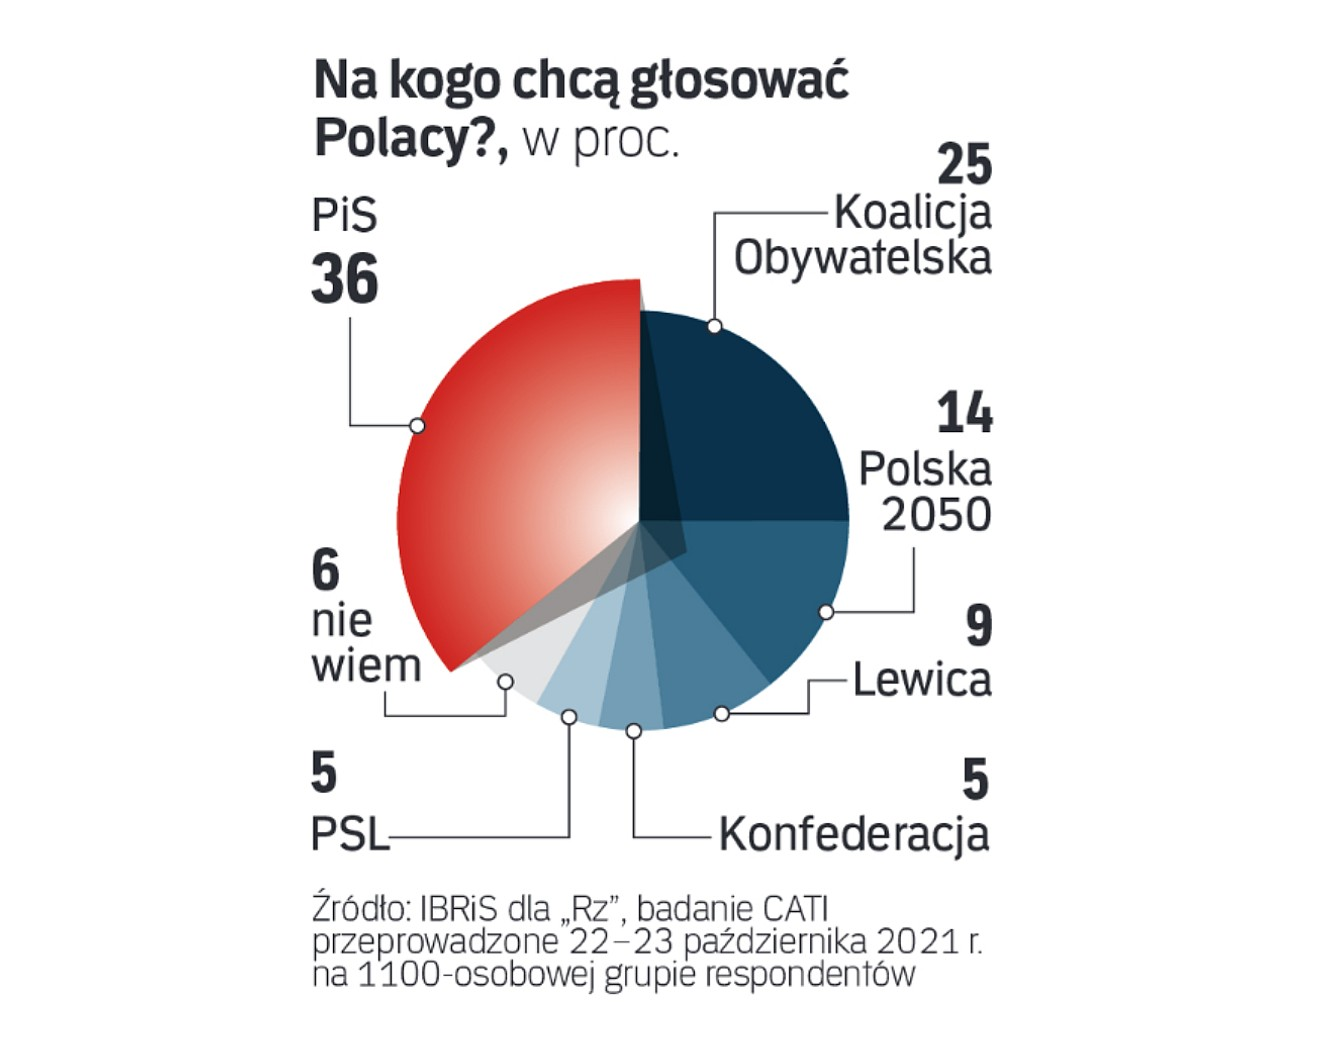

### Wykres w ggplot2
[źródło](https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/SkwarekJan/hw2.pdf/)

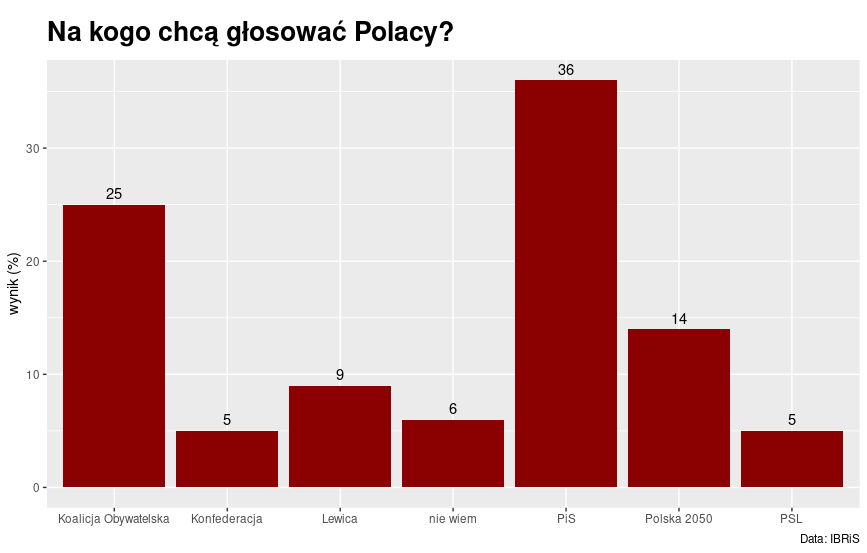

### Poprawa wykresów

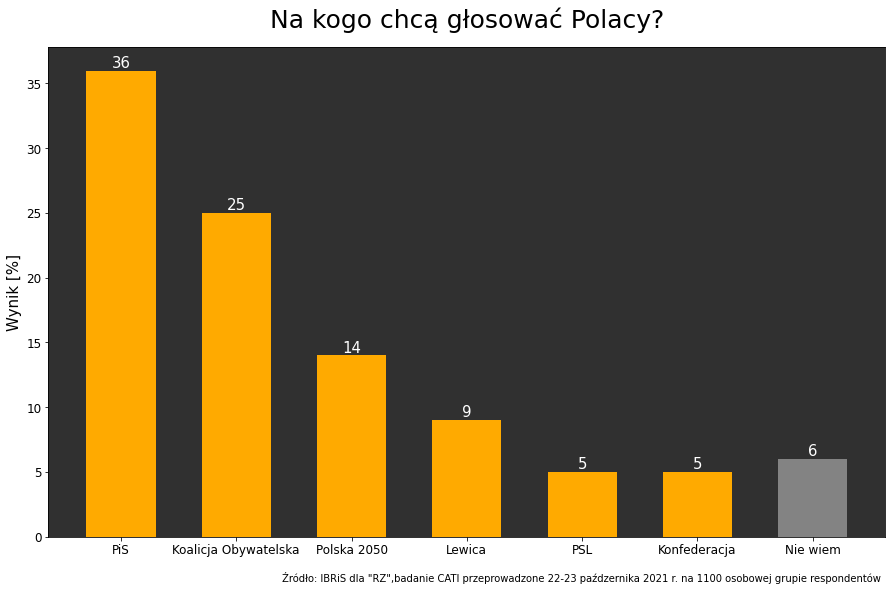

In [190]:
political_parties = np.array(["PiS", "Koalicja Obywatelska", "Polska 2050", "Lewica", "PSL", "Konfederacja", "Nie wiem"])
support = np.array([36, 25, 14, 9, 5, 5, 6])

fig = plt.figure()
fig.set_size_inches(15, 9)
fig.set_facecolor("white")
ax = plt.axes()
ax.plot(alpha=0.25)
ax.set_facecolor('#303030')

color1 = '#ffaa00'
color2 = '#838383'

plt.bar(political_parties, support, width = 0.6,
        color = [color1, color1, color1,
                 color1, color1, color1,
                 color2],)

plt.title("Na kogo chcą głosować Polacy?", y = 1, pad = 20)
plt.ylabel("Wynik [%]")

SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 25

plt.rc('axes', titlesize = BIGGER_SIZE)
plt.rc('axes', labelsize = MEDIUM_SIZE)
plt.rc('xtick', labelsize = SMALL_SIZE)
plt.rc('ytick', labelsize = SMALL_SIZE)

ax.bar_label(ax.containers[0], fontsize = MEDIUM_SIZE, color = 'w')
ax.text(1.4, -3.5, "Źródło: IBRiS dla \"RZ\",badanie CATI przeprowadzone 22-23 paźdzernika 2021 r. na 1100 osobowej grupie respondentów", fontsize=10)

plt.show()

### Dlaczego nowy wykres jest lepszy?

Względem oryginalnego wykresu główną poprawą jest przede wszystkim zmiana wykresu z kołowego na słupkowy. Wiadomo powszechnie, że ludzkie oko lepiej widzi różnice między długościami kolumn niż wielkością kątów. Z tego względu nastąpiła ta zmiana. Drugim punktem jest zmiana różnorodnych kolorów na jednolity. Zmiana kolorów powinna się wiązać z nową informacją, którą chcielibyśmy przekazać. Wyjątkiem na nowym wykresie jest ostatnia kolumna "Nie wiem". Zmiana jej koloru podkreśla fakt, że nie jest to żadna nazwa partii politycznej, a zamiast tego oznacza niedecydowanie ankietowanego. Tego rodzaju wyróżnienia zabrakło na wykresie z ggplot2. Ostatnie dwie zmiany dotyczą wyłącznie wykresu z ggplot2. Na początku kolumny zostały ustawione w kolejności względem wysokości. Taki układ lepiej porządkuje dane na wizualizacji. Wyjątkiem jest ostatnia kolumna, lecz wynika to z tego, że nie dotyczy żadnej partii i również jest to pewnego rodzaju konwencja w wykresach przedstawiających poparcie polityczne dla różnych ugrupowań. Ostatnia zmiana dotyczy siatki w tle. Została ona usunięta, ponieważ wartości liczbowe wysokości słupków są już napisane nad nimi, więc dokładanie przedziałki nie wydawało się potrzebne.